In [1]:
#Ning Tientso
#27 Nov 2019
#Metaheuristics TP6

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import math
from mpl_toolkits import mplot3d
%matplotlib inline

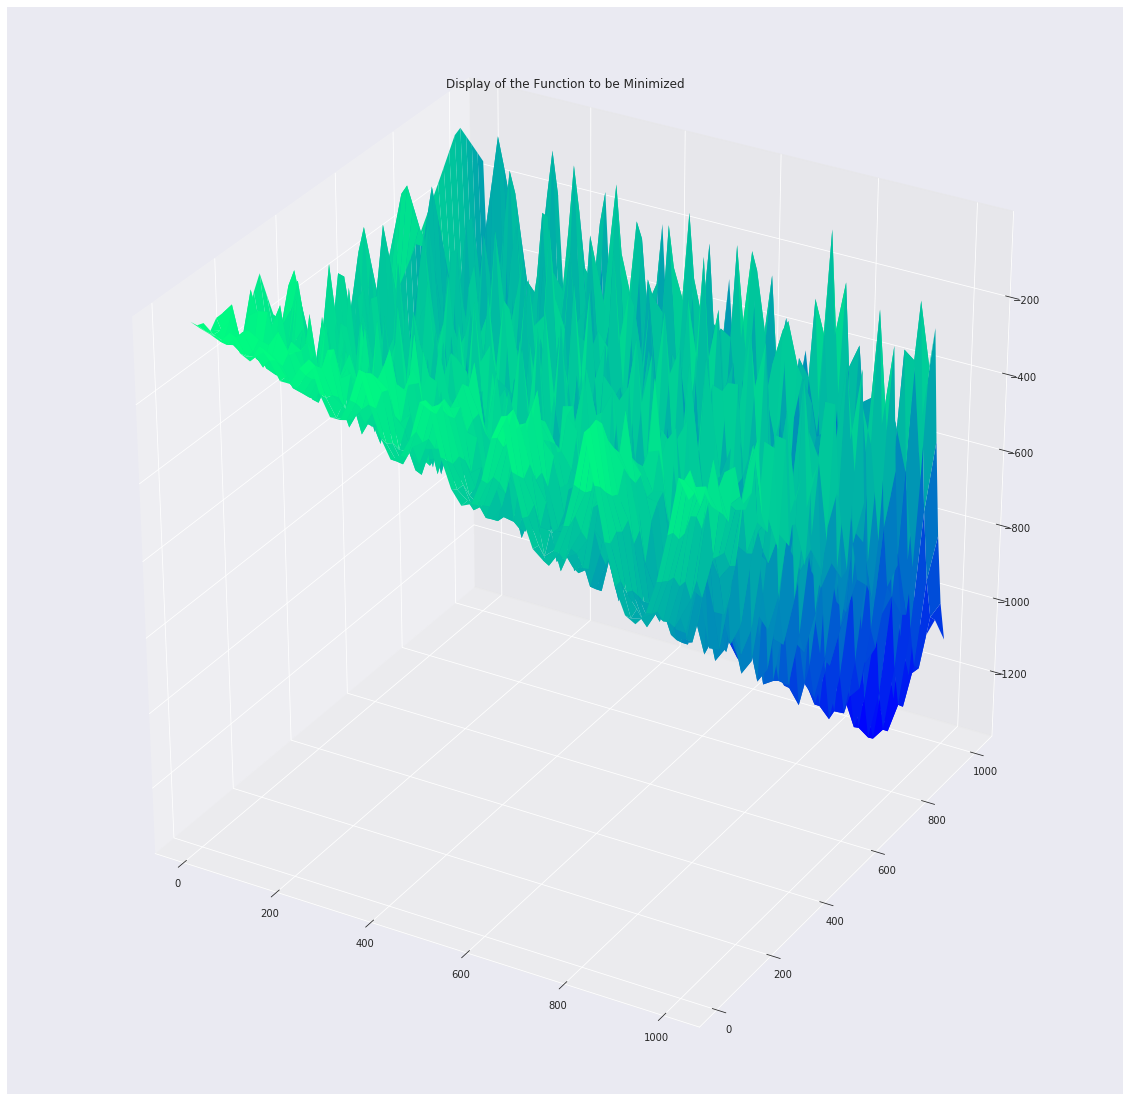

In [2]:
#Visualize the formula

def f(x,y):

    return np.subtract(np.multiply(-1, np.absolute(np.multiply(0.5, np.multiply(x,np.sin(np.sqrt(np.absolute(x))))))),np.absolute(np.multiply(y,np.sin(np.multiply(30,np.sqrt(np.absolute(np.divide(x,y))))))))

x = np.linspace(10,1000)
y = np.linspace(10,1000)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

f = plt.figure(figsize=(20,20))
with sb.axes_style("darkgrid"):
    ax = plt.axes(projection="3d")
    ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='winter', edgecolor='none')
    ax.set_title("Display of the Function to be Minimized")

plt.show()

In [16]:
class Individual:
    
    def __init__ (self):
        
        self.solution = np.array([int(x) for x in format(random.getrandbits(20), "020b")])
        self.x = int("".join([str(x) for x in self.solution[0:10]]),2)
        self.y = int("".join([str(x) for x in self.solution[10:]]),2)
    
    def calc_fitness(self):

        #account for the mapping between solution_y, solution_y elementof [0,1024], and x,y elementof [10, 10000]
        if self.x < 10:
            self.x = self.x + 1024 #map it past 1024
        if self.y < 10:
            self.y = self.y + 1024 #map it pas 1024
        
        return np.subtract(np.multiply(-1, np.absolute(np.multiply(0.5, np.multiply(self.x,np.sin(np.sqrt(np.absolute(self.x))))))),np.absolute(np.multiply(self.y,np.sin(np.multiply(30,np.sqrt(np.absolute(np.divide(self.x,self.y))))))))
    
    def mutation(self, pm):
        '''
        With probability pm at each index, alter the value
        '''
        mutated = Individual()
        
        for i,bit in enumerate(self.solution):
            if random.random() < pm: #means that mutation probability is met
                if bit == 0:
                    mutated.solution[i] = 1 #flip the bits
                else:
                    mutated.solution[i] = 0
        
        #update x,y
        self.x = int("".join([str(x) for x in self.solution[0:10]]),2)
        self.y = int("".join([str(x) for x in self.solution[10:]]),2)
        
        return mutated
    
    def crossover(self, other, pc=0.6):
        '''
        With probability pc, swap x1 with x0, y1 with y0
        default value is 0.6 as defined by the assignment
        '''
        child1 = Individual()
        child2 = Individual()
        
        if random.random() < pc: #cross over probability is met
            child1.solution = np.concatenate((self.solution[0:10], other.solution[10:]),axis=None)
            child2.solution = np.concatenate((other.solution[0:10], self.solution[10:]),axis=None)
            return child1, child2 #give back the children
        else:
            return None, None #return nothing
        
def tournament_selection(population, size=5):
    '''
    tournament selection method, default number of tournament players is defined as 
    five by the assignment, "use the 5-tournament selection."
    '''
    N = len(population) #population size N
    arena = [] #tournament size
    future = [] #intermediate population
    
    while(len(future)<N):
        
        #randomly select for tournament
        for i in range(size):
            x = random.randint(0,N-1)
            candidate = population[x]
            candidate_fit = candidate.calc_fitness()
            arena.append((candidate, candidate_fit)) #append as many as the tournament needs to run
        
        #select and put into the intermediate population
        best = min(arena, key=lambda x:x[1])
        future.append(best[0]) 
    
    return future

def generate_population(N=100):
    '''
    create a population of size N.
    default population size is 100 as defined by the assignment.
    '''
    population = []
    
    for i in range(N):
        population.append(Individual()) #create a new Individual and add it to the population
    
    return population


def genetic_algorithm(prob_mutate, with_crossover, max_gen=10):
    '''
    genetic algorithm proper
    '''
    
    #variables
    generation = 0
    Pm = prob_mutate
    
    #create a population
    population = generate_population()
    
    #for each generation
    while(1):
        
        #check stop conditions
        if(generation >= max_gen):
            #find best
            best_fit = [None, 0.0]
            for individual in population:
                if individual.calc_fitness() < best_fit[1]:
                    best_fit = [individual, individual.calc_fitness()]
            return (best_fit[0].solution, best_fit[0].calc_fitness())
        
        #selection
        population = tournament_selection(population)
        
        #crossover
        if(with_crossover):
            zoomers = []
            for i in range(0,len(population),2):
                zoomer1, zoomer2 = population[i].crossover(population[i+1]) #crossover
                if zoomer1 == None or zoomer2 == None:
                    #no new children
                    pass
                else:  
                    population[i] = zoomer1 #replace parents
                    population[i+1] = zoomer2
                    
        #mutation
        population = [x.mutation(Pm) for x in population]
        
        #increase generation count
        generation += 1

In [17]:
print("0.01 with crossover")
for i in range(10):
    print(genetic_algorithm(0.01, True))
print("0.01 without crossover")
for i in range(10):
    print(genetic_algorithm(0.01, False))
print("0.1 with crossover")
for i in range(10):
    print(genetic_algorithm(0.1, True))
print("0.1 without crossover")
for i in range(10):
    print(genetic_algorithm(0.1, False))

0.01 with crossover
(array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]), -1235.3807103448223)
(array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]), -1337.2842015920141)
(array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]), -1131.4989864274498)
(array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]), -1198.1909842180548)
(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]), -1185.225666515035)
(array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0]), -1150.1082355818805)
(array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0]), -1162.9373906236683)
(array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]), -1198.0720646149318)
(array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1]), -1246.7413313548059)
(array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]), -1196.9333282966359)
0.01 without crossover
(array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1

In [18]:
#find average number of generations needed to reach

for j in range(1,11):
    print("Using {0} Generations".format(j))
    for i in range(20):
        print(genetic_algorithm(0.01, True, j))

Using 1 Generations
(array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]), -1105.3049137499759)
(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]), -1317.613499028549)
(array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]), -1310.2692937324243)
(array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0]), -1186.4789128046725)
(array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]), -1327.222159683221)
(array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]), -1045.0663747305687)
(array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]), -1256.3711387958156)
(array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]), -1242.4285062714512)
(array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0]), -1088.8955231185037)
(array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]), -1070.5805109495134)
(array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1]), -1

(array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]), -1233.4143971594542)
(array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1]), -1252.2357513972715)
(array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0]), -1196.0469893241009)
(array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]), -1305.9005376215184)
(array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]), -1249.5093516493926)
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]), -1213.859828055753)
(array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]), -1349.8439739694022)
(array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]), -1345.5338763151724)
(array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]), -1217.9483684916222)
(array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]), -1345.9039970876222)
Using 6 Generations
(array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1]), -

(array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]), -1338.80225014881)
(array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]), -1265.1131469297784)
(array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]), -1157.8472458059077)
(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]), -1279.2111513691211)
(array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]), -1196.5216518944887)
(array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]), -1216.816720278687)
(array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0]), -1065.7587520853272)
(array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]), -1336.6054193968166)
(array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]), -1294.644185860403)
(array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]), -1261.2712075473676)
(array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]), -1229.4409084468332)
(ar